In [9]:
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)
import my_parser

In [10]:
import matplotlib.pyplot as plt

In [11]:
data = my_parser.get_all()

In [12]:
label_map = {'Reject': 0, 'Accept': 1}
binary_labels = [label_map[item['label']['label']] for item in data]

print(binary_labels)

[1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 

(array([4992.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        5008.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

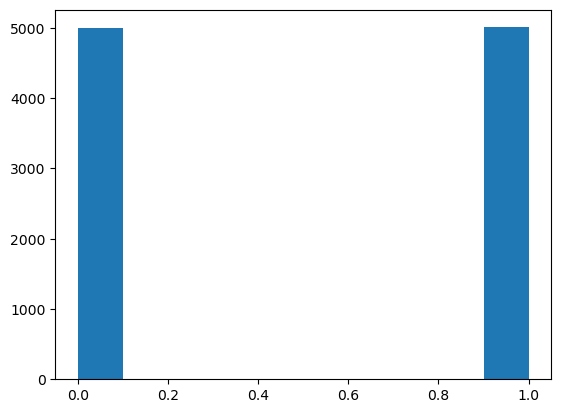

In [13]:
plt.hist(binary_labels)

In [6]:
data[0]['passport']['first_name'] == data[0]['account_form']['first_name']

True

In [15]:
label_map = {'Reject': 0, 'Accept': 1}

# Define fields to check across sources (without '.json')
fields_to_check = {
    'first_name': ['passport', 'account_form'],
    'middle_name': ['passport', 'account_form'],
    'last_name': ['passport', 'account_form'],
    'passport_number': ['passport', 'client_profile', 'account_form'],
    'birth_date': ['passport', 'client_profile'],
    'gender': ['passport', 'client_profile'],
    'nationality': ['passport', 'client_profile'],
    'passport_issue_date': ['passport', 'client_profile'],
    'passport_expiry_date': ['passport', 'client_profile'],
    'country_of_domicile': ['client_profile', 'account_form'],
    'email_address': ['client_profile', 'account_form'],
    'phone_number': ['client_profile', 'account_form'],
    'currency': ['client_profile', 'account_form'],
    'address': ['client_profile', 'account_form'],
}

# Track stats for each field
field_stats = {field: {'match': 0, 'total': 0} for field in fields_to_check}

# Loop through entries
for entry in data:
    if label_map.get(entry.get('label', {}).get('label')) == 1:
        continue  # Skip if not 'Accept'

    for field, sources in fields_to_check.items():
        values = []
        for src in sources:
            val = entry.get(src, {}).get(field)
            values.append(val)

        # Count only if we have at least 2 non-None values to compare
        non_none_values = [v for v in values if v is not None]
        if len(non_none_values) >= 2:
            if all(v == non_none_values[0] for v in non_none_values):
                field_stats[field]['match'] += 1
            field_stats[field]['total'] += 1

# Print the result
print("📊 Consistency report for 'Accept' entries:\n")
for field, stat in field_stats.items():
    total = stat['total']
    match = stat['match']
    if total > 0:
        percent = 100 * match / total
        print(f"✅ {field:20}: {percent:.2f}% consistent ({match}/{total})")
    else:
        print(f"⚠️  {field:20}: No valid comparisons")


📊 Consistency report for 'Accept' entries:

✅ first_name          : 93.65% consistent (4675/4992)
✅ middle_name         : 97.64% consistent (4874/4992)
✅ last_name           : 91.81% consistent (4583/4992)
✅ passport_number     : 97.24% consistent (4854/4992)
✅ birth_date          : 94.67% consistent (4726/4992)
✅ gender              : 98.48% consistent (4916/4992)
✅ nationality         : 95.89% consistent (4787/4992)
✅ passport_issue_date : 95.93% consistent (4789/4992)
✅ passport_expiry_date: 94.89% consistent (4737/4992)
✅ country_of_domicile : 97.12% consistent (4848/4992)
✅ email_address       : 96.51% consistent (4818/4992)
✅ phone_number        : 83.85% consistent (4186/4992)
✅ currency            : 98.60% consistent (4922/4992)
✅ address             : 94.71% consistent (4728/4992)


In [28]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

label_map = {'Reject': 0, 'Accept': 1}

fields_to_check = {
    'first_name': ['passport', 'account_form'],
    'middle_name': ['passport', 'account_form'],
    'last_name': ['passport', 'account_form'],
    'passport_number': ['passport', 'client_profile', 'account_form'],
    'birth_date': ['passport', 'client_profile'],
    'gender': ['passport', 'client_profile'],
    'nationality': ['passport', 'client_profile'],
    'passport_issue_date': ['passport', 'client_profile'],
    'passport_expiry_date': ['passport', 'client_profile'],
    'country_of_domicile': ['client_profile', 'account_form'],
    'email_address': ['client_profile', 'account_form'],
    'phone_number': ['client_profile', 'account_form'],
    'currency': ['client_profile', 'account_form'],
    'address': ['client_profile', 'account_form'],
}

true_labels = []
predicted_labels = []

for entry in data:
    label = label_map.get(entry.get('label', {}).get('label'))
    if label is None:
        continue

    # Check consistency across fields
    all_consistent = True
    for field, sources in fields_to_check.items():
        values = []
        for src in sources:
            val = entry.get(src, {}).get(field)
            values.append(val)
        non_none = [v for v in values if v is not None]
        if len(non_none) >= 2 and not all(v == non_none[0] for v in non_none):
            all_consistent = False
            break

    predicted = 1 if all_consistent else 0
    true_labels.append(label)
    predicted_labels.append(predicted)

# Evaluate
print("📊 Classification Report:\n")
print(classification_report(true_labels, predicted_labels, target_names=["Reject", "Accept"]))

print("🧮 Confusion Matrix:")
cm = confusion_matrix(true_labels, predicted_labels)
print(cm)


📊 Classification Report:

              precision    recall  f1-score   support

      Reject       1.00      0.50      0.67      4992
      Accept       0.67      1.00      0.80      5008

    accuracy                           0.75     10000
   macro avg       0.83      0.75      0.73     10000
weighted avg       0.83      0.75      0.73     10000

🧮 Confusion Matrix:
[[2506 2486]
 [   0 5008]]


In [17]:
# Identify false positives
false_positives = [
    idx for idx, (true, pred) in enumerate(zip(true_labels, predicted_labels))
    if true == 0 and pred == 1
]

print("\n❌ False Positive Indices:")
print(false_positives)



❌ False Positive Indices:
[4, 5, 6, 9, 10, 12, 14, 17, 18, 20, 21, 27, 31, 32, 38, 47, 48, 49, 53, 62, 71, 79, 80, 86, 89, 90, 92, 97, 100, 102, 104, 105, 106, 107, 109, 116, 118, 122, 123, 129, 135, 138, 142, 149, 151, 152, 153, 154, 156, 160, 161, 164, 181, 182, 183, 192, 196, 197, 201, 202, 207, 212, 217, 220, 222, 228, 236, 245, 246, 248, 249, 250, 251, 257, 262, 269, 271, 272, 275, 287, 288, 290, 293, 305, 306, 313, 314, 322, 324, 330, 332, 334, 337, 339, 348, 349, 350, 353, 354, 358, 369, 370, 372, 373, 374, 380, 385, 389, 391, 392, 406, 421, 424, 429, 431, 438, 441, 442, 447, 458, 459, 466, 479, 489, 491, 504, 506, 509, 513, 514, 519, 520, 521, 532, 534, 535, 536, 541, 547, 548, 555, 557, 559, 564, 571, 572, 578, 580, 585, 589, 590, 598, 600, 604, 610, 633, 634, 635, 636, 640, 645, 646, 651, 653, 655, 656, 660, 667, 672, 673, 677, 678, 679, 681, 683, 689, 690, 694, 697, 706, 708, 712, 713, 717, 721, 723, 728, 729, 731, 734, 749, 753, 758, 767, 770, 775, 776, 777, 778, 782, 785,

In [29]:
from sklearn.metrics import confusion_matrix, classification_report

label_map = {'Reject': 0, 'Accept': 1}

fields_to_check = {
    'first_name': ['passport', 'account_form'],
    'middle_name': ['passport', 'account_form'],
    'last_name': ['passport', 'account_form'],
    'passport_number': ['passport', 'client_profile', 'account_form'],
    'birth_date': ['passport', 'client_profile'],
    'gender': ['passport', 'client_profile'],
    'nationality': ['passport', 'client_profile'],
    'passport_issue_date': ['passport', 'client_profile'],
    'passport_expiry_date': ['passport', 'client_profile'],
    'country_of_domicile': ['client_profile', 'account_form'],
    'email_address': ['client_profile', 'account_form'],
    'phone_number': ['client_profile', 'account_form'],
    'currency': ['client_profile', 'account_form'],
    'address': ['client_profile', 'account_form'],
}

def extract_passport_number_from_mrz(mrz_lines):
    if mrz_lines and len(mrz_lines) >= 2:
        return mrz_lines[1][:9].strip('<')
    return None

true_labels = []
predicted_labels = []
false_positives = []

for idx, entry in enumerate(data):
    label = label_map.get(entry.get('label', {}).get('label'))
    if label is None:
        continue

    all_consistent = True

    # Standard field consistency check
    for field, sources in fields_to_check.items():
        values = [entry.get(src, {}).get(field) for src in sources]
        non_none = [v for v in values if v is not None]
        if len(non_none) >= 2 and not all(v == non_none[0] for v in non_none):
            all_consistent = False
            break

    # Additional check: is MRZ passport number consistent?
    mrz_lines = entry.get('passport', {}).get('passport_mrz')
    mrz_number = extract_passport_number_from_mrz(mrz_lines)

    # Compare MRZ passport number to actual stated numbers
    passport_numbers = [
        entry.get('passport', {}).get('passport_number'),
        entry.get('client_profile', {}).get('passport_number'),
        entry.get('account_form', {}).get('passport_number')
    ]
    passport_numbers = [p for p in passport_numbers if p is not None]

    if mrz_number and passport_numbers:
        if not all(mrz_number == p for p in passport_numbers):
            all_consistent = False

    # Predict based on consistency
    predicted = 1 if all_consistent else 0
    true_labels.append(label)
    predicted_labels.append(predicted)

    if label == 0 and predicted == 1:
        false_positives.append(idx)

# Evaluate
print("📊 Classification Report:\n")
print(classification_report(true_labels, predicted_labels, target_names=["Reject", "Accept"]))

print("🧮 Confusion Matrix:")
cm = confusion_matrix(true_labels, predicted_labels)
print(cm)

print("\n❌ False Positive Indices (predicted Accept, true Reject):")
print(false_positives)


📊 Classification Report:

              precision    recall  f1-score   support

      Reject       1.00      0.51      0.68      4992
      Accept       0.67      1.00      0.80      5008

    accuracy                           0.76     10000
   macro avg       0.84      0.75      0.74     10000
weighted avg       0.84      0.76      0.74     10000

🧮 Confusion Matrix:
[[2545 2447]
 [   0 5008]]

❌ False Positive Indices (predicted Accept, true Reject):
[5, 6, 9, 10, 12, 14, 17, 18, 20, 21, 27, 31, 32, 38, 47, 48, 49, 53, 62, 71, 79, 80, 86, 89, 90, 92, 97, 100, 102, 104, 105, 106, 107, 109, 116, 118, 122, 123, 129, 135, 138, 142, 149, 151, 152, 153, 154, 156, 160, 161, 164, 181, 182, 183, 192, 196, 197, 201, 202, 207, 212, 217, 222, 228, 236, 245, 246, 248, 249, 250, 257, 262, 269, 271, 272, 275, 287, 288, 290, 293, 305, 306, 313, 314, 322, 324, 330, 332, 334, 337, 339, 348, 349, 350, 353, 354, 358, 369, 370, 372, 373, 374, 380, 385, 389, 391, 392, 406, 421, 424, 429, 431, 438, 441, 